## Import the Libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

## Load the Dataset

In [189]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\diabetes.csv")

In [190]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [191]:
df.shape

(768, 9)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [193]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [194]:
# data dictionary
for i in df.columns:
    print(f"Feature {i} has a unique count of {df[i].nunique()}")   

Feature Pregnancies has a unique count of 17
Feature Glucose has a unique count of 136
Feature BloodPressure has a unique count of 47
Feature SkinThickness has a unique count of 51
Feature Insulin has a unique count of 186
Feature BMI has a unique count of 248
Feature DiabetesPedigreeFunction has a unique count of 517
Feature Age has a unique count of 52
Feature Outcome has a unique count of 2


In [195]:
cat_data=df[df.dtypes[df.dtypes=="object"].index]
num_data=df[df.dtypes[df.dtypes!="object"].index]

In [196]:
cat_data.columns

Index([], dtype='object')

In [197]:
eda_num=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]

In [198]:
eda_cat=["Pregnancies"]

In [199]:
len(eda_cat)

1

In [200]:
len(eda_num)

8

In [201]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,73.01000,76.000,79.00000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,184.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.00000,0.000,38.70000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,92.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,45.32000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,325.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.90100,21.000,21.80000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,45.33200,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.134,0.14035,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.000,21.00000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [202]:
cat_data.isnull().sum()

Series([], dtype: float64)

In [203]:
num_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Exploratory Data Analysis

## Univariate Analysis

## Histogram

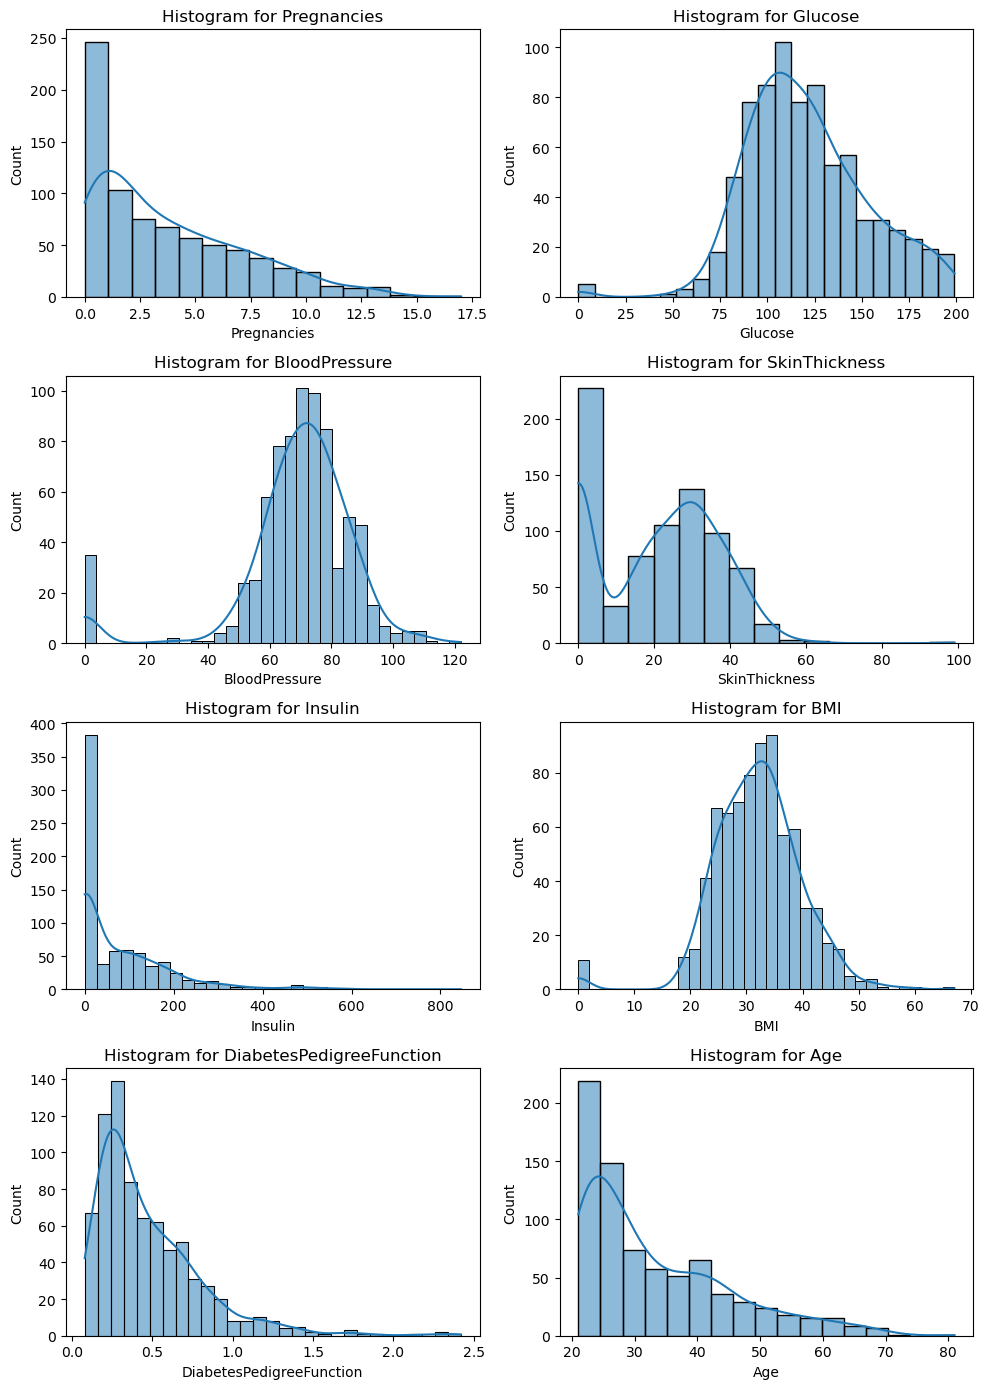

In [204]:
plt.figure(figsize=(10,14))
for i in range(len(eda_num)):
    plt.subplot(4,2,i+1)
    sns.histplot(x=df[eda_num[i]],kde=True)
    plt.title(f'Histogram for {eda_num[i]}')
plt.tight_layout()
plt.show()

* mostly data is right skewed except bloodpressure and glucose
* bmi shows a normal distribution

## Boxplot

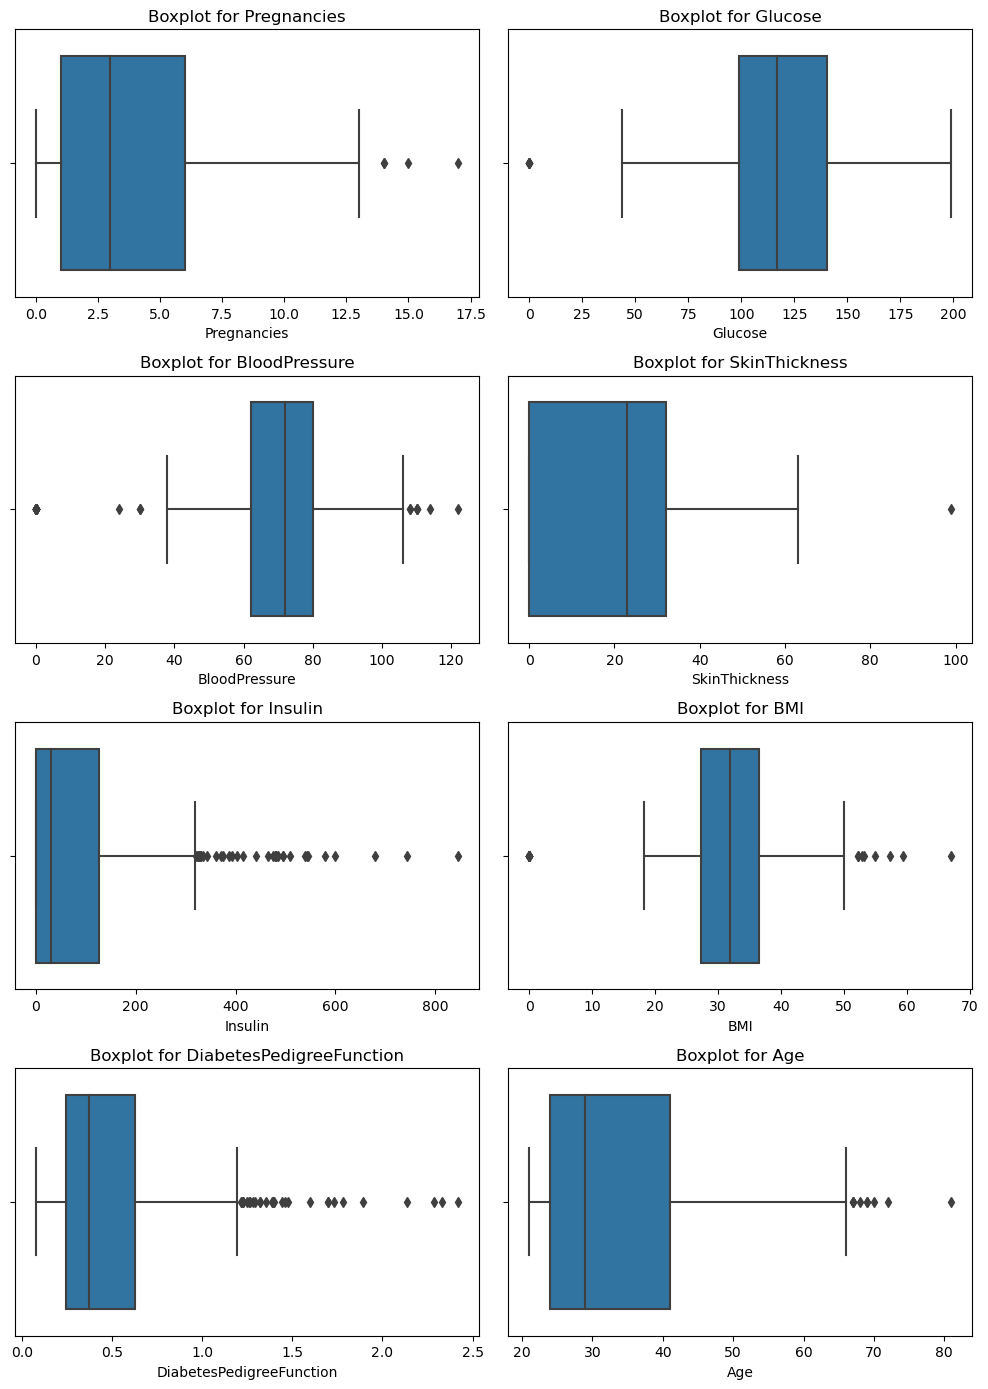

In [205]:
plt.figure(figsize=(10,14))
for i in range(len(eda_num)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[eda_num[i]])
    plt.title(f'Boxplot for {eda_num[i]}')
plt.tight_layout()
plt.show()

* all have right outliers except blood pressure and bmi they have left outliers also
* glucose has only left outliers

## Bivariate Analysis

## Countplot

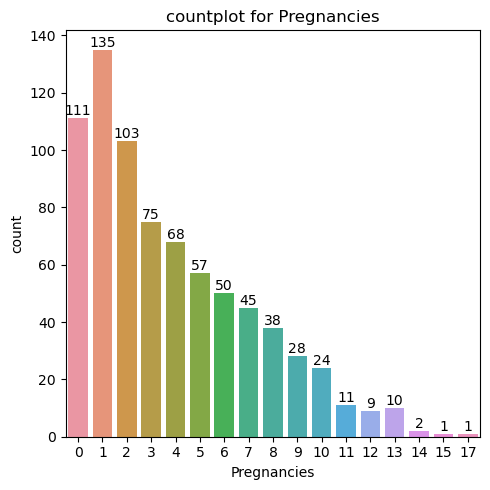

In [206]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df[eda_cat[0]])
ax.bar_label(ax.containers[0])
plt.title(f'countplot for {eda_cat[0]}')
plt.tight_layout()
plt.show()

* people of 0,1 and 2 pregnancies are present in major numbers

## Boxplot WRT to Target

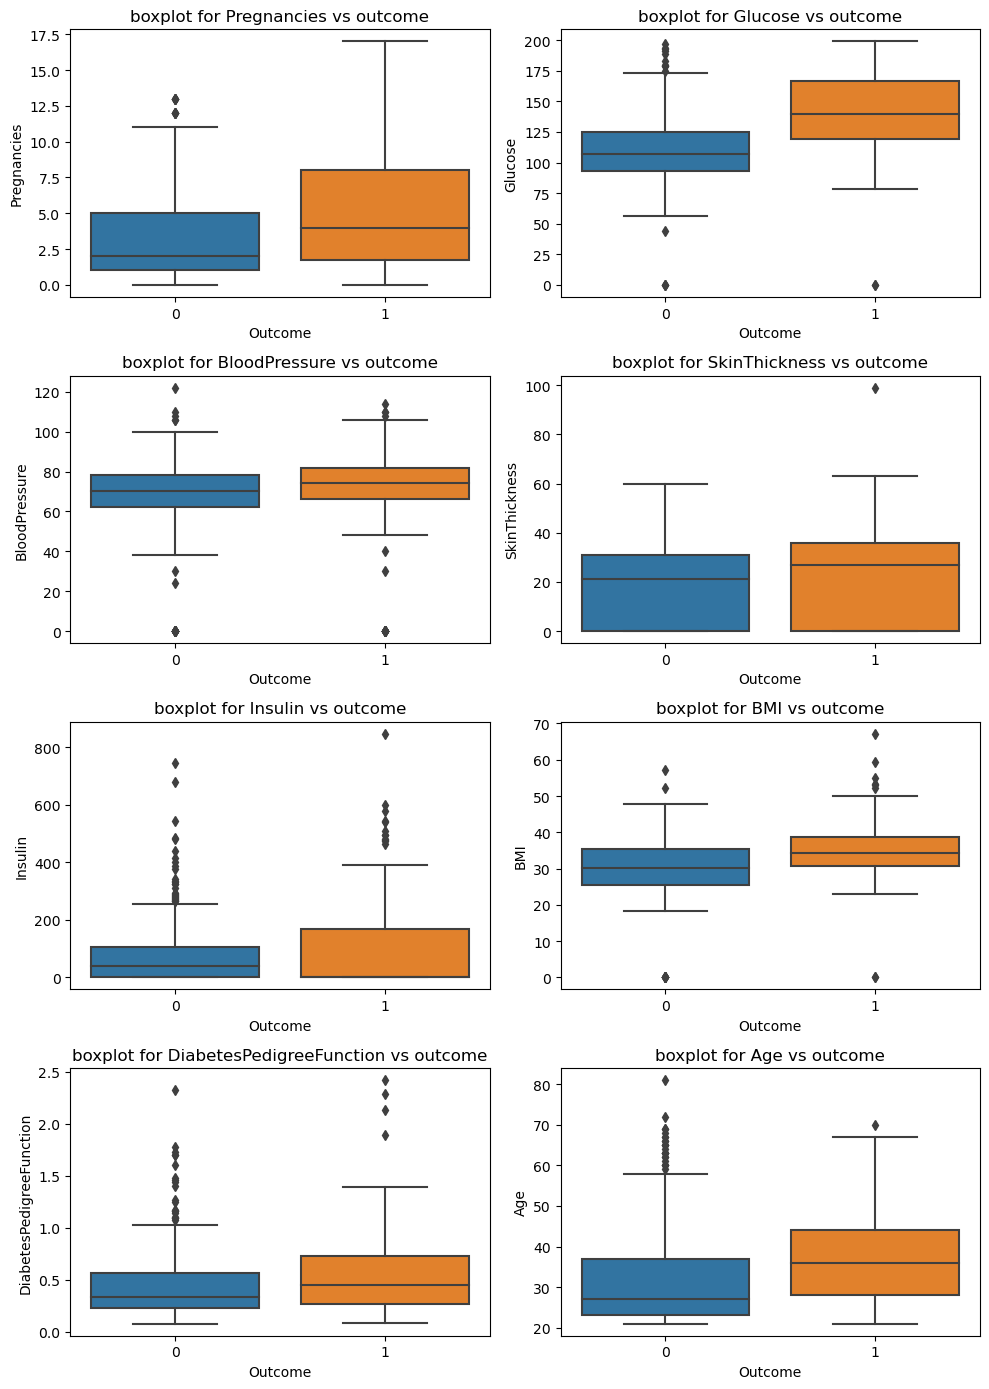

In [207]:
plt.figure(figsize=(10,14))
for i in range(len(eda_num)):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=df[eda_num[i]], x=df["Outcome"])
    plt.title(f"boxplot for {eda_num[i]} vs outcome")
plt.tight_layout()
plt.show()

* people have high glucose, age, bmi, pregnancies have chance of being diabetic

## Countplot WRT to Target

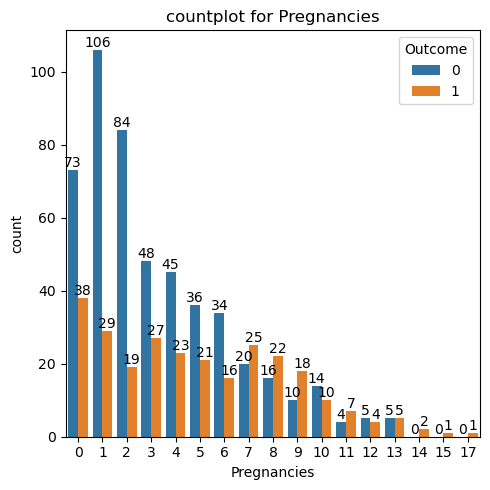

In [208]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df[eda_num[0]], hue=df["Outcome"])
for j in ax.containers:
    ax.bar_label(j)
plt.title(f"countplot for {eda_num[0]}")
plt.tight_layout()
plt.show()

* people having pregnancies greater 6 having very high chance of being diabetic

In [209]:
df['Age Bins']=pd.cut(df['Age'],bins=list(range(20,85,5)))

In [210]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age Bins
0,6,148,72,35,0,33.6,0.627,50,1,"(45, 50]"
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 35]"
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 35]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20, 25]"
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 35]"


In [211]:
df.groupby(["Age Bins","Outcome"])["Age"].count().reset_index()

,Age Bins,Outcome,Age
0,"(20, 25]",0,222
1,"(20, 25]",1,45
2,"(25, 30]",0,105
3,"(25, 30]",1,45
4,"(30, 35]",0,40
5,"(30, 35]",1,41
6,"(35, 40]",0,41
7,"(35, 40]",1,35
8,"(40, 45]",0,32
9,"(40, 45]",1,44


* 35-45 Age group have major Concern of diabetic , Because there age is not so high and still they have diabetic .

## Correlation

In [212]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age Bins'],
      dtype='object')

In [213]:
corr=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age Bins']].corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8600\886929979.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age Bins']].corr()


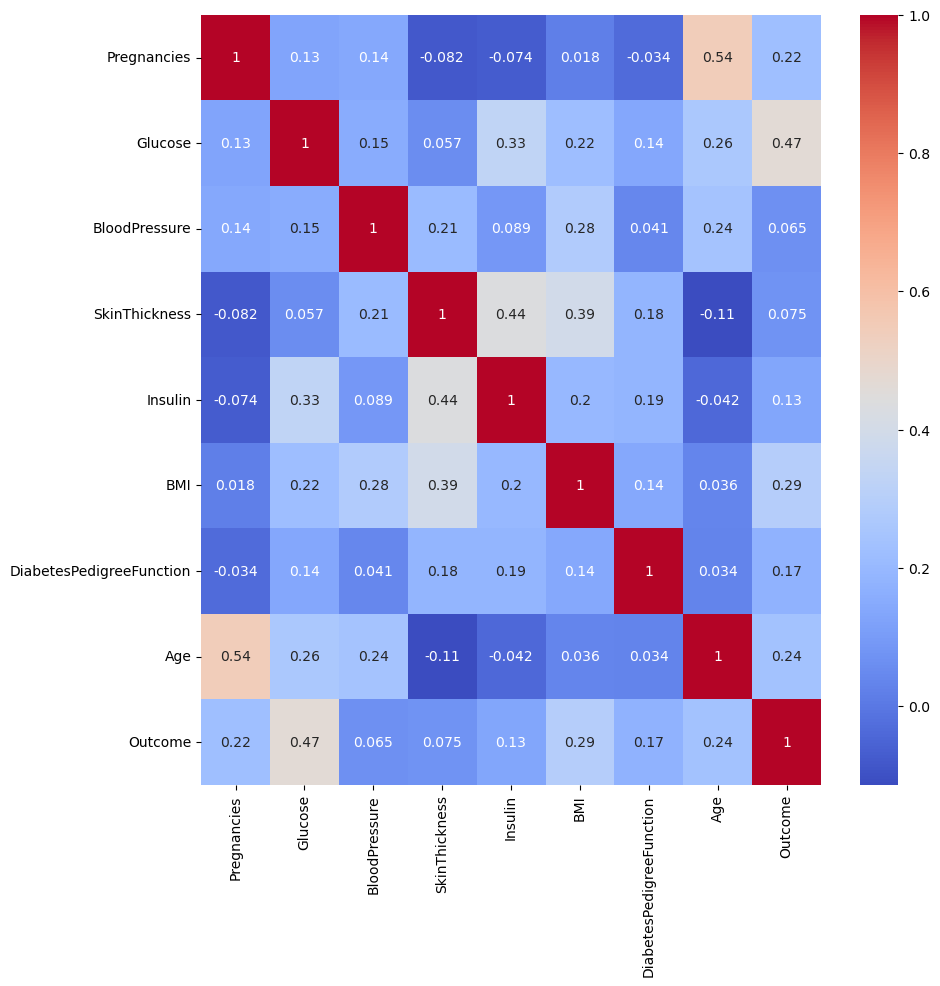

In [214]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

## Check and Treating Null Values

In [215]:
def null_check(x):
    nv=df.isnull().sum()
    res=pd.DataFrame({'Features':nv.index,'Null Count':nv.values,'Null %':(nv.values/df.shape[0])*100})
    res=res.sort_values('Null %',ascending=False)
    return res

In [216]:
null_check(df)

,Features,Null Count,Null %
9,Age Bins,1,0.130208
0,Pregnancies,0,0.000000
1,Glucose,0,0.000000
2,BloodPressure,0,0.000000
3,SkinThickness,0,0.000000
4,Insulin,0,0.000000
5,BMI,0,0.000000
6,DiabetesPedigreeFunction,0,0.000000
7,Age,0,0.000000
8,Outcome,0,0.000000


## Check Duplicated 

In [217]:
df.duplicated().sum()

0

In [218]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95, .96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,73.01000,76.000,79.00000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,184.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.00000,0.000,38.70000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,92.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,45.32000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,325.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.90100,21.000,21.80000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,45.33200,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.134,0.14035,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.000,21.00000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [219]:
def outliercapM1(x):
  x=x.clip(upper=x.quantile(.99))
  # x=x.clip(lower=x.quantile(.01))
  return x

In [220]:
df=df.apply(outliercapM1)

In [221]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.90,.95, .96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.834635,3.336808,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,11.00000,11.00000,12.00000,13.000000,13.00000
Glucose,768.0,120.882812,31.944693,0.000,57.00000,69.02000,73.01000,76.000,79.00000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,184.00000,187.99000,192.32000,196.000000,196.00000
BloodPressure,768.0,69.053385,19.243340,0.000,0.00000,0.00000,0.00000,0.000,38.70000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,92.00000,94.99000,99.32000,106.000000,106.00000
SkinThickness,768.0,20.433125,15.646206,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,45.32000,46.00000,48.00000,51.108900,51.33000
Insulin,768.0,78.604427,109.425722,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,325.00000,369.90000,470.94000,513.267000,519.90000
BMI,768.0,31.936031,7.712781,0.000,0.00000,19.16800,19.90100,21.000,21.80000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,45.33200,46.10000,47.52600,50.250470,50.75900
DiabetesPedigreeFunction,768.0,0.468372,0.314957,0.078,0.09468,0.11902,0.12701,0.134,0.14035,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.18424,1.25793,1.39066,1.698109,1.69833
Age,768.0,33.205729,11.645318,21.000,21.00000,21.00000,21.00000,21.000,21.00000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,60.00000,62.00000,64.66000,67.000000,67.00000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.000000,1.00000


## Treating the Inconsistent data

In [222]:
df.shape

(768, 10)

In [223]:
df[df["Glucose"]==0.00].shape

(5, 10)

In [224]:
df["Glucose"]=np.where(df["Glucose"]==0.00,df["Glucose"].median(),df["Glucose"])

In [225]:
df[df['BloodPressure']==0.00].shape

(35, 10)

In [70]:
df.drop(["Glucose"], axis=1, inplace=True)

In [226]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age Bins
0,6,148.0,72,35.0,0.0,33.6,0.62700,50,1,"(45, 50]"
1,1,85.0,66,29.0,0.0,26.6,0.35100,31,0,"(30, 35]"
2,8,183.0,64,0.0,0.0,23.3,0.67200,32,1,"(30, 35]"
3,1,89.0,66,23.0,94.0,28.1,0.16700,21,0,"(20, 25]"
4,0,137.0,40,35.0,168.0,43.1,1.69833,33,1,"(30, 35]"


In [227]:
df['BloodPressure']=np.where(df['BloodPressure']==0.00,df['BloodPressure'].median(),df['BloodPressure'])

In [228]:
df[df["SkinThickness"]==0.00].shape

(227, 10)

In [229]:
df["SkinThickness"]=np.where(df["SkinThickness"]==0.00,df["SkinThickness"].median(),df["SkinThickness"])

In [230]:
df[df["Insulin"]==0.00].shape

(374, 10)

In [231]:
df["Insulin"]=np.where(df["Insulin"]==0.00,df["Insulin"].median(),df["Insulin"])

In [232]:
df[df["BMI"]==0.00].shape

(11, 10)

In [233]:
df["BMI"]=np.where(df["BMI"]==0.00,df["BMI"].median(),df["BMI"])

In [234]:
num_data.fillna(num_data.median(), inplace=True) # Filling median value

## Select X and Y

In [235]:
y=df["Outcome"]

In [236]:
x=df.drop(['Outcome','Age Bins'],axis=1)

## Split into Train and Test Data

In [237]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [238]:
x_train.shape

(576, 8)

In [239]:
y_train.shape

(576,)

In [240]:
x_test.shape

(192, 8)

In [241]:
y_test.shape

(192,)

## Data Standardization

In [242]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [243]:
ss=StandardScaler()

In [244]:
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.transform(x_test)
print(x_train_ss.shape)
print(x_test_ss.shape)

(576, 8)
(192, 8)


In [245]:
x_train_ss = pd.DataFrame(x_train_ss, columns=x_train.columns)
x_test_ss = pd.DataFrame(x_test_ss, columns=x_test.columns)
print(x_train_ss.shape)
print(x_test_ss.shape)

(576, 8)
(192, 8)


## Data Normalization

In [246]:
ms=MinMaxScaler((0,1))

In [247]:
x_train_ms=ms.fit_transform(x_train)
x_test_ms=ms.transform(x_test)
print(x_train_ms.shape)
print(x_test_ms.shape)

(576, 8)
(192, 8)


In [248]:
x_train_ms=pd.DataFrame(x_train_ms,columns=x_train.columns)
x_test_ms = pd.DataFrame(x_test_ms, columns=x_test.columns)
print(x_train_ms.shape)
print(x_test_ms.shape)

(576, 8)
(192, 8)


## Advance Function Which Calculated All Models Scores

In [249]:
from sklearn.metrics import *

In [253]:
def eval_classification(model,x_train,x_test,y_train,y_test,model_name):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    train=model.score(x_train,y_train)
    test=model.score(x_test,y_test)
    pre1=precision_score(y_test,y_pred)
    rec1=recall_score(y_test,y_pred)
    res=pd.DataFrame({'Train Acc':train,'Test Acc':test,'PRECISON':pre1,'RECALL':rec1},index=[model_name])
    print('Confusion matrix\n',cm)
    print('Classification report\n',cr)
    return res,y_pred

## Logistic Regression

In [254]:
lg1=LogisticRegression()

In [255]:
lg1_res,lg1_pred=eval_classification(lg1,x_train,x_test,y_train,y_test,'Log_Reg')
lg1_res

Confusion matrix
 [[101  22]
 [ 26  43]]
Classification report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       123
           1       0.66      0.62      0.64        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



C:\Users\LENOVO\Documents\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg,0.788194,0.75,0.661538,0.623188


In [256]:
lg2=LogisticRegression()

In [261]:
lg2_res,lg2_pred=eval_classification(lg2,x_train,x_test,y_train,y_test,"Log_Reg[ss]")
lg2_res

Confusion matrix
 [[101  22]
 [ 26  43]]
Classification report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       123
           1       0.66      0.62      0.64        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



C:\Users\LENOVO\Documents\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg[ss],0.788194,0.75,0.661538,0.623188


In [259]:
lg3=LogisticRegression()

In [262]:
lg3_res,lg3_pred=eval_classification(lg3,x_train,x_test,y_train,y_test,"Log_Reg[ms]")
lg3_res

Confusion matrix
 [[101  22]
 [ 26  43]]
Classification report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       123
           1       0.66      0.62      0.64        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



C:\Users\LENOVO\Documents\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg[ms],0.788194,0.75,0.661538,0.623188


## Linear Regression

In [263]:
line=LinearRegression()

In [264]:
line.fit(x_train,y_train)

LinearRegression()

In [265]:
line.coef_

array([ 0.00918813,  0.00680941, -0.00191892,  0.00132707, -0.00027515,
        0.01554004,  0.08133303,  0.00603129])

In [266]:
line.intercept_

-1.1260402308681428

In [267]:
pred_train=line.predict(x_train)

In [268]:
pred_train

array([ 6.96779248e-01,  2.79311805e-01,  2.00928469e-02, -3.22433284e-02,
        1.17191394e-01,  2.86861198e-02,  2.84160780e-01,  6.69529296e-01,
        1.37209211e-01,  1.47402089e-01,  3.59609904e-01,  3.13390300e-01,
        6.09343813e-01,  7.48794384e-02,  1.02727382e-01,  3.21300512e-01,
        9.03059523e-01,  6.26819064e-01,  3.21626311e-01,  2.36825004e-01,
        2.01196035e-01,  1.50139181e-01,  6.69036590e-01,  1.01419936e-01,
        6.87796524e-01,  3.21363418e-01,  3.90825802e-01,  8.57410365e-01,
        6.12837604e-01,  1.03581571e-01,  6.06160694e-02,  2.09605633e-01,
        2.60801451e-02,  5.25017174e-01,  2.27963405e-01,  3.32490991e-01,
        3.44775241e-01,  2.45221183e-01,  1.09843181e-01, -5.19234603e-02,
        2.01021972e-01,  4.81473179e-01,  3.50715785e-01,  4.41340441e-01,
        8.02802111e-02,  3.26995747e-01,  3.73303601e-01,  4.88395314e-01,
        1.44029996e-01, -4.99280990e-06,  5.05531423e-01,  1.28941213e-01,
        2.18636804e-01,  

In [272]:
pred_test=line.predict(x_test)

In [273]:
pred_test

array([ 2.99307425e-01,  2.38618302e-01,  1.45212299e-01,  2.01657878e-01,
        4.97075010e-01,  4.26414801e-01, -2.46541014e-01,  4.21060885e-01,
        5.62065895e-01,  7.26801456e-01,  2.94870006e-01,  9.14295177e-01,
        4.18996317e-01,  2.99635101e-01,  4.66943178e-02,  4.10111910e-01,
        1.38107563e-01,  3.63102433e-02,  7.16507829e-01,  5.43091990e-01,
        2.57707930e-01,  5.21485028e-02,  4.91417339e-01,  9.20242553e-02,
        5.17886805e-01,  8.93246636e-01,  1.51717686e-01, -9.06183602e-02,
        2.92745301e-01,  1.09827025e-01,  8.73159790e-01,  8.22021271e-01,
        7.72929201e-01,  6.46219061e-01,  5.38126734e-01,  6.43208507e-01,
        1.11232737e+00,  2.82519963e-01,  4.79463850e-01,  5.00063241e-01,
        1.97045803e-02,  5.65661259e-01,  5.10044907e-01,  3.37409875e-01,
       -1.05442914e-01,  5.41090413e-01,  5.61150591e-01,  2.42830379e-01,
        3.78965884e-01,  1.03855383e+00, -3.05966943e-02,  6.28101382e-01,
        7.49750539e-01,  

In [276]:
mse_train=np.mean((pred_train-y_train)**(2))

In [277]:
mse_test=np.mean((pred_test-y_test)**(2))

In [278]:
print("mse_train",mse_train)
print("mse_test",mse_test)

mse_train 0.1489150097128766
mse_test 0.17675163888045164


In [279]:
rmse_train=np.sqrt(np.mean((pred_train-y_train)**(2)))

In [280]:
rmse_test=np.sqrt(np.mean((pred_test-y_test)**(2)))

In [281]:
print("rmse_train",rmse_train)
print("rmse_test",rmse_test)

rmse_train 0.38589507604124285
rmse_test 0.42041840930250857


In [282]:
mae_train=np.mean(abs(pred_train-y_train))

In [283]:
mae_test=np.mean(abs(pred_test-y_test))

In [284]:
print("mae_train",mae_train)
print("mae_test",mae_test)

mae_train 0.31525011931496844
mae_test 0.3464119874138678


In [285]:
mape_train=np.mean(abs((pred_train-y_train)/y_train))

In [286]:
mape_test=np.mean(abs((pred_test-y_test)/y_test))

In [287]:
print("mape_train",mape_train)
print("mape_test",mape_test)

mape_train inf
mape_test inf


In [288]:
num_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [290]:
import statsmodels.api as sm
x_train1=x_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
x_train1=sm.add_constant(x_train1)
model=sm.OLS(y_train, x_train1)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     36.75
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           5.85e-47
Time:                        14:51:13   Log-Likelihood:                -268.85
No. Observations:                 576   AIC:                             555.7
Df Residuals:                     567   BIC:                             594.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## ROC AUC

In [291]:
from sklearn.metrics import roc_auc_score,roc_curve

In [295]:
ypred_prob = lg1.predict_proba(x_test)  
print(ypred_prob[:5])  # top5 values
print(ypred_prob.shape)

[[0.74858892 0.25141108]
 [0.833741   0.166259  ]
 [0.89701995 0.10298005]
 [0.83843293 0.16156707]
 [0.54768029 0.45231971]]
(192, 2)


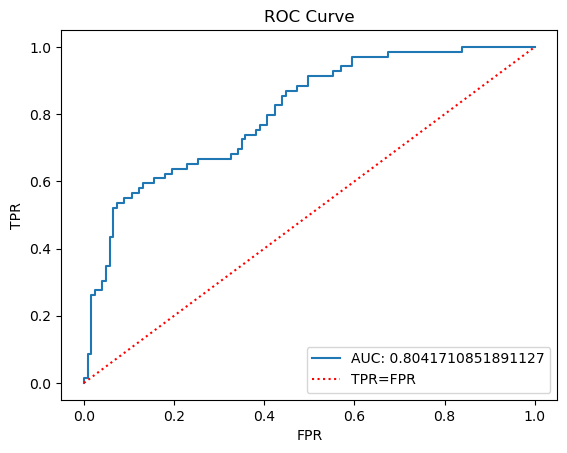

In [296]:
fpr,tpr,thresh = roc_curve(y_test,ypred_prob[:,1])   # ROC curve
auc_score = roc_auc_score(y_test,ypred_prob[:,1])    # AUC_score
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='red',linestyle='dotted',label='TPR=FPR')
plt.title('ROC Curve')
plt.xlabel('FPR')  # FP/(TN+FP)  # prob of +ve prediction when actual values are negative
plt.ylabel('TPR')  # TP/(TP+FN)  # prob of +ve prediction when actual values are positive
plt.legend()
plt.show()

## Best Threshold Values

In [297]:
best_thresh=thresh[np.argmax(tpr-fpr)]
best_thresh

0.5888269620764058

## Change the values based on this new Threshold

In [298]:
y_pred_lg4=np.where(ypred_prob[:,1]>best_thresh,1,0)

## Now check the model on this Threshold

In [299]:
def advanced_eval(model,x_train,y_train,x_test,y_test,y_pred,model_name):
    cm=confusion_matrix(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    train=model.score(x_train,y_train)
    test=model.score(x_test,y_test)
    pre1=precision_score(y_test,y_pred)
    rec1=recall_score(y_test,y_pred)
    res=pd.DataFrame({'Train Acc':train,'Test Acc':test,'PRECISON':pre1,'RECALL':rec1},index=[model_name])
    print('Confusion matrix\n',cm)
    print('Classification report\n',cr)
    return res

In [300]:
lg4_res=advanced_eval(lg1,x_train,y_train,x_test,y_test,y_pred_lg4,f'Log_Reg (thresh={round(best_thresh,3)})')
lg4_res

Confusion matrix
 [[107  16]
 [ 29  40]]
Classification report
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       123
           1       0.71      0.58      0.64        69

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg (thresh=0.589),0.788194,0.75,0.714286,0.57971


## Logistic Regression Increasing Recall

In [301]:
y_pred_lg5=np.where(ypred_prob[:,1]>0.3,1,0)

In [302]:
lg5_res=advanced_eval(lg1,x_train,y_train,x_test,y_test,y_pred_lg5,f'Log_Reg (thresh=0.3)')
lg5_res

Confusion matrix
 [[77 46]
 [18 51]]
Classification report
               precision    recall  f1-score   support

           0       0.81      0.63      0.71       123
           1       0.53      0.74      0.61        69

    accuracy                           0.67       192
   macro avg       0.67      0.68      0.66       192
weighted avg       0.71      0.67      0.67       192



,Train Acc,Test Acc,PRECISON,RECALL
Log_Reg (thresh=0.3),0.788194,0.75,0.525773,0.73913
